Lets tackle this strong enemy with art framework.

At first, we need to download the data. We highly recommend using huggingface datasets wrapped into Lighntning Data Module. But if you want you can use Torch Datasets and DataLoaders.

In [43]:
%load_ext autoreload
%autoreload 2

import datasets
from art_data import MNISTDataModule
from art.enums import INPUT, TARGET
mnist_data = datasets.load_dataset("mnist")

mnist_data = mnist_data.rename_columns({"image": INPUT, "label": TARGET})
mnist_data['train'] = mnist_data['train'].select(range(6000))
#mnist_data['test'] = mnist_data['test'].select(range(16))

mnist_data_module = MNISTDataModule(mnist_data)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Found cached dataset mnist (D:/hf_datasets/mnist/mnist/1.0.0/9d494b7f466d6931c64fb39d58bb1249a4d85c9eb9865d9bc20960b999e2a332)


  0%|          | 0/2 [00:00<?, ?it/s]

#### Data analysis

TBD

#### Baselines

Starting any Machine Learning project it is good to have some baseline for comparison. Here in `ART` we try to encourage you to try at least one of those:
* Ml Baseline - Not for all problems we need Deep Learninr. For tabular data or timeseries there are ML models that you can take off the shelf and obtain very good results. 
* Heuristic Baseline - Sometimes you may have some intuition on how should be data regressed or classified. It is always worth to check how good these are.
* existing solution baseline - If problem is already solved, checking existing solutions and pointing their drawback to improve on is always worth doing.


Another good habbit is to separate your code into many smaller modules, and don't do everything inside one gigantic jupyter notebook. Look inside `baselines.py` file where we have prepared everything for you.

Have you observed plenty of small functions inside each of the class? These will create pipelines of your ArtModule.

e.g `MlBaseline` has functions `parse_data_for_ml` and `baseline_train` that both creates `ml_train_pipeline` that is defined inside art. As you become more familar with `ART` you will be able to create your own pipelines and it's building blocks.

Finally to offer you high level of flexibility we pass data between all stages with use of a dictionary (This will be changed into some better structure in the future).

In [2]:
from baselines import MlBaseline, HeuristicBaseline, AlreadyExistingSolutionBaseline
from sklearn.linear_model import LogisticRegression
from art.metric_calculator import MetricCalculator
from torchmetrics import Accuracy
import torch.nn as nn
from art.step.steps import EvaluateBaselines


MetricCalculator.register_metric(Accuracy(task="multiclass", num_classes = 10))
MetricCalculator.register_metric(nn.CrossEntropyLoss(), exception_steps = [EvaluateBaselines])

TODO Describe metric calculator

In [3]:
from experiment import MyExperiment
exp = MyExperiment("exp1")
exp.add_step(
    EvaluateBaselines(
        [HeuristicBaseline(), MlBaseline(model = LogisticRegression()), AlreadyExistingSolutionBaseline()], mnist_data_module
    ), []
)

In [4]:
#TODO there is a lot of prompt here, discuss if we want tu surpress it
# One solution is logging.getLogger("lightning.pytorch.utilities.rank_zero").setLevel(logging.WARNING) etc.
exp.run_all()

d:\inzynierka\art_template\template\exp1\baselines.py:69: RuntimeWarning: invalid value encountered in divide
  self.prototypes = self.prototypes / self.counts[:, None]
GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\logger_connector\logger_connector.py:67: UserWarning: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. P

Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Validate metric                     ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ MulticlassAccuracy-HeuristicBaseline-VALIDATION-Evalu… │                          0.0                           │
│                       Baselines                        │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Validate metric                     ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│   MulticlassAccuracy-MlBaseline-VALIDATION-Evaluate    │                         0.375                          │
│                       Baselines                        │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

GPU available: True (cuda), used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\setup.py:176: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Validate metric                     ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ MulticlassAccuracy-AlreadyExistingSolutionBaseline-VA… │                          1.0                           │
│                       Baselines                        │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

Evaluate Baselines


Having baselines we can move on to beating them. We will use CNN for this purpose that is defined inside `models.py`

In [5]:
from models import MNISTModel
from art.step.steps import CheckLossOnInit
MetricCalculator.to("cuda")
my_model = MNISTModel()

exp = MyExperiment("exp1") # TODO This should be removed
exp.add_step(CheckLossOnInit(my_model, mnist_data_module), [])
exp.run_all() # TODO Now evaluate baselines shouldn't be run.p
# TODO some kind of exception or indication of not passed stage should be shown.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Validate metric                     ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  CrossEntropyLoss-MNISTModel-VALIDATION-Check Loss On  │                   13.639652252197266                   │
│                          Init                          │                                                        │
│ MulticlassAccuracy-MNISTModel-VALIDATION-Check Loss On │                          0.25                          │
│                          Init                          │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

Check Loss On Init


We have 10 classes, so on average with random initialization loss should be -log(1/10) = 2.31, something must be wrong in our pipeline. Lets discover another feature of art that helps you to debug the code. 

In [6]:
import lovely_tensors as lt
from art.visualization_decorators import set_visualization
lt.monkey_patch()


set_visualization([(my_model, "predict")], print)
exp.run_all() # Now evaluate baselines shouldn't be run.p

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Validation: 0it [00:00, ?it/s]

{'input': tensor[16, 1, 28, 28] n=12544 x∈[0., 255.000] μ=30.152 σ=74.955 cuda:0, 'target': tensor[16] i64 x∈[0, 9] μ=3.438 σ=2.502 cuda:0}


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                    Validate metric                     ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  CrossEntropyLoss-MNISTModel-VALIDATION-Check Loss On  │                   13.639652252197266                   │
│                          Init                          │                                                        │
│ MulticlassAccuracy-MNISTModel-VALIDATION-Check Loss On │                          0.25                          │
│                          Init                          │                                                        │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

Check Loss On Init


You may decorate any function in your pipeline with some any logging function. Here it is simple print, but in practice you can do much, much more, which you will see later. Can you spot what is wrong? Yes we do not normalize images to [0,1] range. Change the 26 line in `baselines.py`


Let's move further. We have already found some issues. Next step is to overfit just single batch. If you can't do this there is for sure something wrong

In [23]:
from models import MNISTModel
from art.step.steps import OverfitOneBatch
exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY
exp.add_step(OverfitOneBatch(MNISTModel(), mnist_data_module), [])
exp.run_all() # Now evaluate baselines shouldn't be run.p

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(overfit_batches=1)` was configured so 1 batch will be used.
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | Sequential       | 2.7 K 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have 

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Loss at the end of overfitting: 1.9363691806793213
Overfit One Batch


Oh no... again we can't overfit. It this an issue with model? Maybe but at first let's see another powerful usecase of art. We will debug the prediction dynamics too see how our model is evolving. We will calculate average logit value for all images that should be classified as 0

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(overfit_batches=1)` was configured so 1 batch will be used.
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | Sequential       | 2.7 K 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have 

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Loss at the end of overfitting: 1.8182512521743774
Overfit One Batch


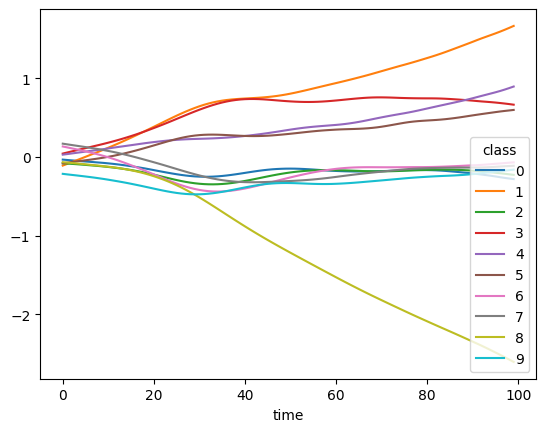

In [37]:
class EvolutionSaver:
    def __init__(self):
        self.logits = []
        self.time = 0

    def __call__(self, data):
        targets = data['target'] == 1
        logits = data['prediction']

        wanted_logits = logits[targets].mean(dim=0)
        for i, logit in enumerate(wanted_logits):
            self.logits.append({
                "time": self.time,
                "logit": logit.item(),
                "class": i
            })

        self.time += 1    

    def visualize(self):
        import pandas as pd
        import matplotlib.pyplot as plt
        df = pd.DataFrame(self.logits)
        df = df.pivot(index='time', columns='class', values='logit')
        df.plot()
        plt.show()

exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY
my_model = MNISTModel()
evolution_saver = EvolutionSaver()
set_visualization([(my_model, "predict")], None, evolution_saver)
exp.add_step(OverfitOneBatch(my_model, mnist_data_module), [])
exp.run_all()
evolution_saver.visualize()

So, as you can see we move in correct direction - Probably we should just wait a little bit longer. Moreover, we see how powerful decorators can be. This helps us make our code more modular and fulfill Open-Closed principle.

We can solve our problem in two ways:
* Either increase learning rate.
* Or train for longer.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(overfit_batches=1)` was configured so 1 batch will be used.
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | Sequential       | 2.7 K 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have 

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


Loss at the end of overfitting: 0.038760241121053696
Overfit One Batch


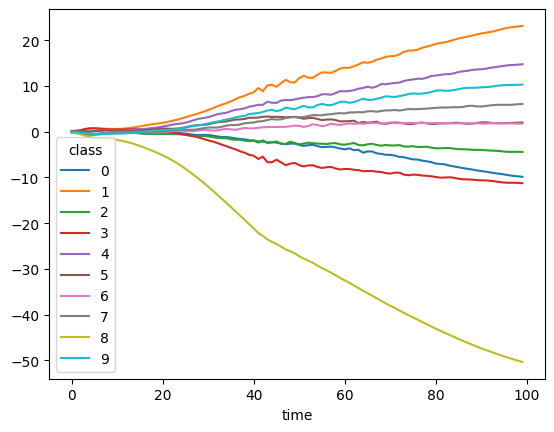

In [38]:
exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY
my_model = MNISTModel(lr=0.01)
evolution_saver = EvolutionSaver()
set_visualization([(my_model, "predict")], None, evolution_saver)
exp.add_step(OverfitOneBatch(my_model, mnist_data_module), [])
exp.run_all()
evolution_saver.visualize()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(overfit_batches=1)` was configured so 1 batch will be used.
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | Sequential       | 2.7 K 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)
c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have 

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=500` reached.


Loss at the end of overfitting: 0.040623024106025696
Overfit One Batch


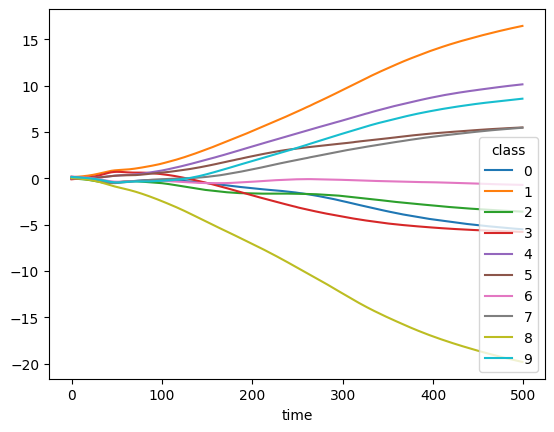

In [40]:
exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY
my_model = MNISTModel()
evolution_saver = EvolutionSaver()
set_visualization([(my_model, "predict")], None, evolution_saver)
exp.add_step(OverfitOneBatch(my_model, mnist_data_module, number_of_steps=500), [])
exp.run_all()
evolution_saver.visualize()

But for the very beginning of the training process we'd recommend not to play with learning rate and stick with default value. It is better to just wait for a little bit longer. Now another Step can be taken. Overfitting entire training set. This is also very important as this somehow approximates our best possible score that can be achieved. If it is much below our expected result this again may indicate problems.

In [52]:
from art.step.steps import Overfit
exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY
my_model = MNISTModel()
exp.add_step(Overfit(my_model, mnist_data_module, max_epochs=50), [])
exp.run_all()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params
---------------------------------------------
0 | model   | Sequential       | 2.7 K 
1 | loss_fn | CrossEntropyLoss | 0     
---------------------------------------------
2.7 K     Trainable params
0         Non-trainable params
2.7 K     Total params
0.011     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

c:\Users\sebas\mambaforge\lib\site-packages\lightning\pytorch\trainer\call.py:52: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                 Validate metric                  ┃                   DataLoader 0                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│  CrossEntropyLoss-MNISTModel-VALIDATION-Overfit  │                0.6968225240707397                │
│ MulticlassAccuracy-MNISTModel-VALIDATION-Overfit │                0.7818333506584167                │
│                    train_loss                    │                0.6968225240707397                │
└──────────────────────────────────────────────────┴──────────────────────────────────────────────────┘

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:5                                                                                    │
│                                                                                                  │
│   2 exp = MyExperiment("exp1") # TODO THIS SHOULDN'T BE NECESSARY                                │
│   3 my_model = MNISTModel()                                                                      │
│   4 exp.add_step(Overfit(my_model, mnist_data_module, max_epochs=50), [])                        │
│ ❱ 5 exp.run_all()                                                                                │
│   6                                                                                              │
│                                                                                                  │
│ d:\inzynierka\art_template\template\exp1\experiment.py:36 in run_all                             │
│                                                                                                  │
│   33 │   def run_all(self):                                                                      │
│   34 │   │   for step, checks in zip(self.steps, self.checks):                                   │
│   35 │   │   │   # Dependency injection so that user doesn't have to pass metric function eve    │
│ ❱ 36 │   │   │   step()                                                                          │
│   37 │   │   │   # step.save_result() #TODO: should it be separate function, in my opinion no    │
│   38 │   │   │   print(step.name)                                                                │
│   39 │   │   │   for check in checks:                                                            │
│                                                                                                  │
│ D:\inzynierka\art\art\step\steps.py:153 in __call__                                              │
│                                                                                                  │
│   150 │   │   │   model=self.model, dataloaders=self.datamodule.train_dataloader()               │
│   151 │   │   )                                                                                  │
│   152 │   │   # TODO pass this loss somewhere to check if stage is passed succesfully.           │
│ ❱ 153 │   │   loss_at_the_end = float(self.results[0]["validation_loss"])                        │
│   154 │   │   print(f"Loss at the end of overfitting: {loss_at_the_end}")                        │
│   155 │   │   JSONStepSaver().save(                                                              │
│   156 │   │   │   {"loss_at_the_end": loss_at_the_end}, self.name, "results.json"                │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'validation_loss'

In [46]:
from art.experiment_state import ExperimentState

In [49]:
ExperimentState.current_step